In [ ]:
!pip install tensorflow-gpu
!pip install PyDrive

## First we need to load some things

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Shape_Maker import Data_Generator, make_rectangle, make_circle
from Visualizing_Model.Visualing_Model import visualization_model_class

Using TensorFlow backend.


In [2]:
%matplotlib notebook

In [3]:
image_size = 64

## The make_rectangle and make_circle will both return circles and rectangles, and the Data_Generator will randomly create circles or rectangles

<IPython.core.display.Javascript object>


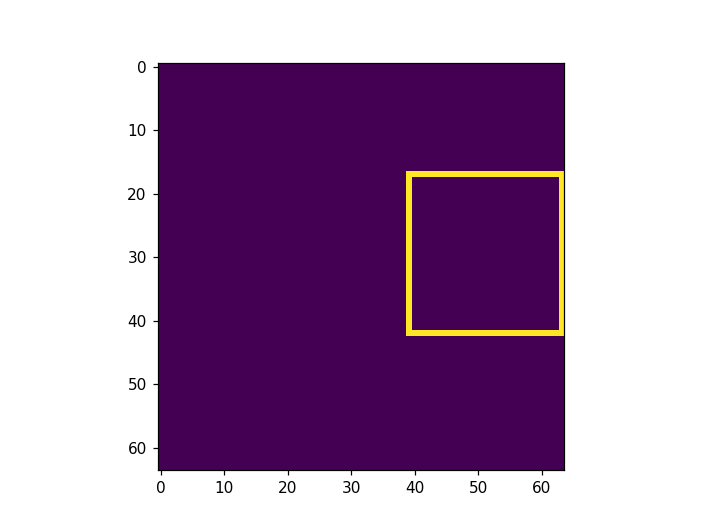

In [4]:
plt.imshow(make_rectangle(image_size))

In [ ]:
plt.imshow(make_circle(image_size))

## What do we need? We need a way to generate larges amounts of training data for our model..

### This is a 'generator', it is something which continously creates data

In [5]:
train_generator = Data_Generator(image_size=image_size,batch_size=32, num_examples_per_epoch=100)

In [6]:
x,y = train_generator.__getitem__(0)
print(x.shape)
print(y.shape)

(32, 64, 64, 1)
(32, 2)


## Now lets make our network!

In [7]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from keras.optimizers import Adam

In [8]:
model = Sequential([
    Conv2D(1, (3,3), input_shape=(image_size, image_size, 1), padding='same',name='Conv_0'),
    MaxPool2D((image_size)), # Pool into a 1x1x6 image
    Flatten(),
    Dense(2),
    Activation('softmax')
])

W1017 12:19:51.128464 24504 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1017 12:19:51.140998 24504 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1017 12:19:51.143004 24504 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1017 12:19:51.155081 24504 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool

In [9]:
model.compile(Adam(lr=1e-1), loss='categorical_crossentropy', metrics=['accuracy'])

W1017 12:19:53.149749 24504 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1017 12:19:53.157273 24504 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
model.fit_generator(train_generator,epochs=3)

W1017 12:19:53.713576 24504 deprecation.py:323] From c:\users\bmanderson\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1017 12:19:53.754194 24504 deprecation_wrapper.py:119] From C:\Users\bmanderson\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/3
100/100 [==============================] - 2s 16ms/step - loss: 0.1088 - acc: 0.9584
Epoch 2/3
100/100 [==============================] - 1s 15ms/step - loss: 0.0010 - acc: 1.0000
Epoch 3/3
100/100 [==============================] - 1s 15ms/step - loss: 4.7506e-04 - acc: 1.0000


In [11]:
def determine_accuracy(model, image_size= 64, num_examples=1000):
    truth = np.zeros((num_examples,1))
    guess = np.zeros((num_examples,1))
    index = 0
    for _ in range(num_examples//2):
        pred = model.predict(make_rectangle(image_size)[None,...,None])
        guess[index] = np.argmax(pred)
        truth[index] = 1
        index += 1
    for _ in range(num_examples//2):
        pred = model.predict(make_circle(image_size)[None,...,None])
        guess[index] = np.argmax(pred)
        index += 1
    print('Accuracy is {} for {} examples'.format(str((guess==truth).sum()/num_examples),num_examples))

In [12]:
determine_accuracy(model)

Accuracy is 1.0 for 1000 examples


In [13]:
rectangle = make_rectangle(image_size)[None,...,None]
circle = make_circle(image_size)[None,...,None]
print(model.predict(rectangle)[...,1]*100)
print(model.predict(circle)[...,0]*100)

[99.94461]
[99.99816]


## Lets see what the kernels and activations look like

In [15]:
Visualizing_Class = visualization_model_class(model=model)

Conv_0
max_pooling2d_1
flatten_1
dense_1


In [16]:
Visualizing_Class.define_desired_layers(desired_layer_names=['Conv_0'])

## Kernels

Conv_0


<IPython.core.display.Javascript object>


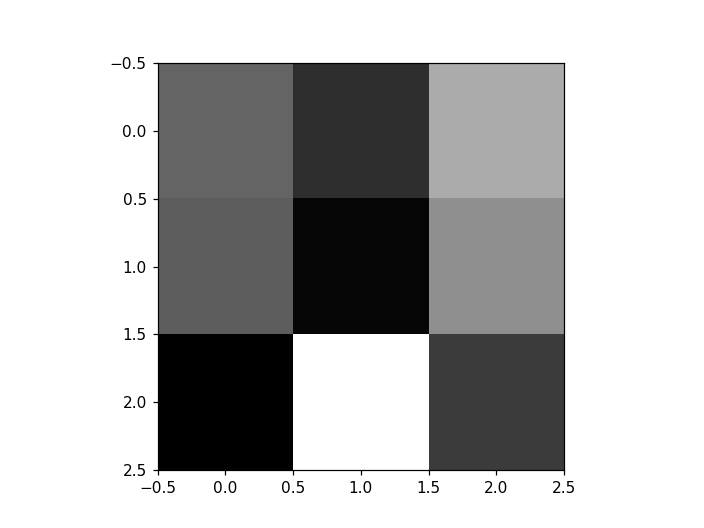

In [17]:
Visualizing_Class.plot_kernels()

## Activations
#### In order to make an activation map we need to provide it with something to predict on

In [18]:
Visualizing_Class.predict_on_tensor(make_rectangle(image_size)[None,...,None])

['Conv_0']
Conv_0
0.0


<IPython.core.display.Javascript object>


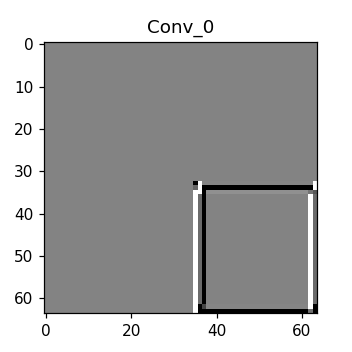

In [21]:
Visualizing_Class.plot_activations()

## How big is this model? Super tiny!!

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_0 (Conv2D)              (None, 64, 64, 1)         10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 1)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
